# 一、准备工作
## 1. 指定文件目录

In [64]:
!mkdir -p drive
!google-drive-ocamlfuse drive
import os

os.chdir("drive/Colab Notebooks") 
!ls

 com2018.ipynb	 data.csv  'one week.ipynb'   网格搜索调参.ipynb
 data_all.csv	 drive	    授权代码.ipynb


## 2. 导入需要的包

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE


# 二、读取数据并拆分数据集


跑原始文件的时候会有报错：“'utf-8' codec can't decode byte 0xbf in position 0”。  
这是因为数据文件不是utf-8编码格式，所以需要将csv文件另存为utf8 csv格式的，就可以解决该问题。

In [0]:
data_all = pd.read_csv('./data.csv')
Y = data_all['status']
X = data_all.drop('status', axis=1)

# 按7:3拆分成training和testing集，随机种子为2018。随机种子的目的是使每次拆分的结果一致
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=2018)

# 三、数据预处理

## 1. 概览



* 该训练集，一共有89个变量，3327个样本。  
* 很明显第一列没有列名，其实是ID，所以可以直接去掉。  
  
* 数据的缺失值情况还是比较多，在本次情况中数据缺失并不是空值，而是存在大量的NA值。  

* 从数据类型角度来看，有一些object类型的特殊数据。    
  
|列名|情况说明|
| :--- | :--- |
|bank_card_no  | 值里面有很多个???               
|reg_preference_for_trad| 值里面有很多个???
|source| 值都为xs
|id_name|值里面有很多个??? 
|latest_query_time|日期
|loans_latest_time|日期

     那些值里是??的字段直接去掉，source只有一个值，也可直接去掉。


In [67]:
# 总体情况
print(X_train.shape)
X_train.describe()
X_train.info()

(3327, 89)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3327 entries, 110 to 1274
Data columns (total 89 columns):
Unnamed: 0                                    3327 non-null int64
custid                                        3327 non-null int64
trade_no                                      3327 non-null float64
bank_card_no                                  3327 non-null object
low_volume_percent                            3325 non-null float64
middle_volume_percent                         3325 non-null float64
take_amount_in_later_12_month_highest         3327 non-null int64
trans_amount_increase_rate_lately             3325 non-null float64
trans_activity_month                          3325 non-null float64
trans_activity_day                            3325 non-null float64
transd_mcc                                    3325 non-null float64
trans_days_interval_filter                    3321 non-null float64
trans_days_interval                           3325 non-null float64
reg

In [68]:
# 找出object类型的列
for i in X_train.columns:
    if X_train[i].dtypes == 'object':
        print(i)

bank_card_no
reg_preference_for_trad
source
id_name
latest_query_time
loans_latest_time


In [0]:
# 清除第一列和包含???的列
X_train.drop(['Unnamed: 0','id_name', 'bank_card_no', 'reg_preference_for_trad',\
              'latest_query_time', 'loans_latest_time','source'], axis=1, inplace=True)


**遇到问题**：  
剩下两个object是日期格式的字段。单纯的日期格式在很多地方都无法直接处理。  
需要对日期做进一步的处理。比如转换成年月日三个单独的数据，或者根据字段具体含义做天数或月数计算，或者直接删除日期字段。  
这些都需要视具体业务知识来定。  
  
在这里偷懒了，为了方便起见，直接删除了。其实转换成距离现在的天数差更好？

## 2. 区分离散变量和连续变量

## 3. 变量筛选

两种思路：  
一是看变量唯一值的个数，如果只有一种值，肯定不要
二是采用机器学习方法，信息增益等。

## 4. 缺失值处理

处理NA的情况。由于已经把object数据删除了，所以剩下的数值型数据，都采用均值填充。

In [0]:
imputer = Imputer(strategy='mean')
num = imputer.fit_transform(X_train)
X_train = pd.DataFrame(num, columns=X_train.columns)

## 5. 数据不平衡处理

本次问题存在类别不平衡问题，原始数据类别间比例约为2.5:1。  
采用SMOTE方法进行过采样处理。

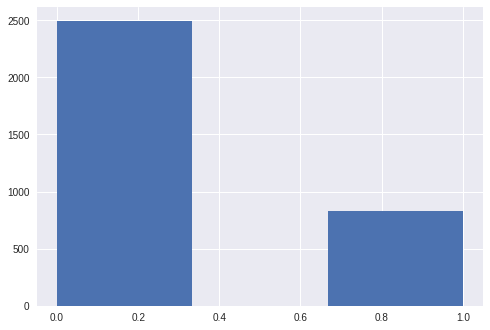

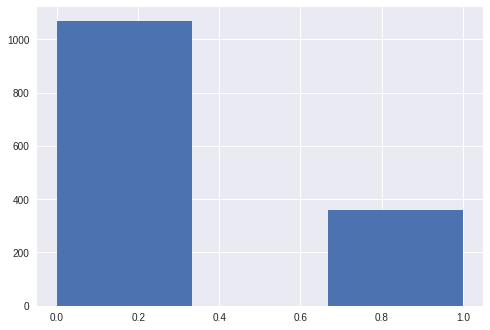

In [81]:
# 查看label的分布，存在数据不平衡问题的。直接初步建模也验证了这一现象。
plt.hist(Y_train, bins=3)
plt.show()
plt.hist(Y_test, bins=3)
plt.show()

In [0]:
over_samples = SMOTE(random_state=2018) 
over_samples_X,over_samples_y = over_samples.fit_sample(X_train, Y_train)

# 重抽样前的类别比例
print(Y_train.value_counts()/len(Y_train))
# 重抽样后的类别比例
print(pd.Series(over_samples_y).value_counts()/len(over_samples_y))

# 四、本次遇到问题或后续待处理
1. 日期数据的处理
2. 如何自动区分连续变量和离散变量？
3. 貌似问号是数据编码问题，其实是中文。如果是中文的话，是直接删除还是需要另做处理？怎么做？
4. 缺失值填充，连续变量和离散变量应该分开来处理？
5. 时间原因，变量筛选尚为完成，后续补充